# CURSO DE ESTATÍSTICA - PARTE 3

# 1 CONHECENDO OS DADOS

## 1.1 Dataset do projeto

### Pesquisa Nacional por Amostra de Domicílios - 2015

A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

### Renda
> Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

### Idade
> Idade do morador na data de referência em anos.

### Altura (elaboração artificial para fins de estudo)
> Altura do morador em metros.

### UF
> |Código|Descrição|
> |---|---|
> |11|Rondônia|
> |12|Acre|
> |13|Amazonas|
> |14|Roraima|
> |15|Pará|
> |16|Amapá|
> |17|Tocantins|
> |21|Maranhão|
> |22|Piauí|
> |23|Ceará|
> |24|Rio Grande do Norte|
> |25|Paraíba|
> |26|Pernambuco|
> |27|Alagoas|
> |28|Sergipe|
> |29|Bahia|
> |31|Minas Gerais|
> |32|Espírito Santo|
> |33|Rio de Janeiro|
> |35|São Paulo|
> |41|Paraná|
> |42|Santa Catarina|
> |43|Rio Grande do Sul|
> |50|Mato Grosso do Sul|
> |51|Mato Grosso|
> |52|Goiás|
> |53|Distrito Federal|

### Sexo
> |Código|Descrição|
> |---|---|
> |0|Masculino|
> |1|Feminino|

### Anos de Estudo
> |Código|Descrição|
> |---|---|
> |1|Sem instrução e menos de 1 ano|
> |2|1 ano|
> |3|2 anos|
> |4|3 anos|
> |5|4 anos|
> |6|5 anos|
> |7|6 anos|
> |8|7 anos|
> |9|8 anos|
> |10|9 anos|
> |11|10 anos|
> |12|11 anos|
> |13|12 anos|
> |14|13 anos|
> |15|14 anos|
> |16|15 anos ou mais|
> |17|Não determinados|
> ||Não aplicável|

### Cor
> |Código|Descrição|
> |---|---|
> |0|Indígena|
> |2|Branca|
> |4|Preta|
> |6|Amarela|
> |8|Parda|
> |9|Sem declaração|

#### Observação
> Os seguintes tratamentos foram realizados nos dados originais:

> 1. Foram eliminados os registros onde a Renda era inválida (999 999 999 999);

> 2. Foram eliminados os registros onde a Renda era missing;

> 3. Foram considerados somente os registros das Pessoas de Referência de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [173]:
import pandas as pd
import numpy as np

In [174]:
caminho = 'https://raw.githubusercontent.com/bruno-kalel/lab-math-stats/refs/heads/main/stats-with-python/data/dados.csv'

In [175]:
dados = pd.read_csv(caminho)
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [176]:
dados.columns = dados.columns.str.replace(' ', '_').str.lower()
dados.columns

Index(['uf', 'sexo', 'idade', 'cor', 'anos_de_estudo', 'renda', 'altura'], dtype='object')

In [177]:
dados = dados.sort_index(axis='columns')
dados.head(10)

,altura,anos_de_estudo,cor,idade,renda,sexo,uf
0,1.603808,12,8,23,800,0,11
1,1.739790,12,2,23,1150,1,11
2,1.760444,15,8,35,880,1,11
3,1.783158,6,2,46,3500,0,11
4,1.690631,9,8,47,150,1,11
5,1.637906,12,8,34,790,1,11
6,1.570078,12,8,57,3150,0,11
7,1.608495,12,8,60,1700,1,11
8,1.780329,14,4,50,1800,1,11
9,1.793203,12,8,26,1150,0,11


# 2 TESTES DE HIPÓTESES

Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

## 2.1 Teste de normalidade

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [178]:
from scipy.stats import normaltest

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

### Definindo a significância do teste ($\alpha$)

In [179]:
significância = 0.05

### Testando a variável Renda

<Axes: >

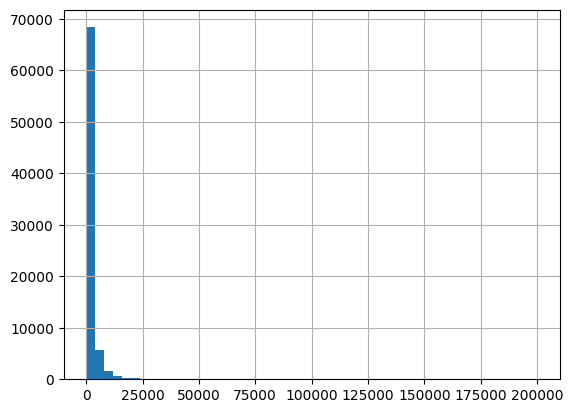

In [180]:
dados.renda.hist(bins=50)

### Critério do valor $p$

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [181]:
stat_test, p_valor = normaltest(dados.renda)
stat_test, p_valor

(152380.75803960307, 0.0)

In [182]:
p_valor <= significância

True

In [183]:
f'{"rejeitar H0" if p_valor <= significância else "não rejeitar H0"}'

'rejeitar H0'

### Testando a variável Altura

<Axes: >

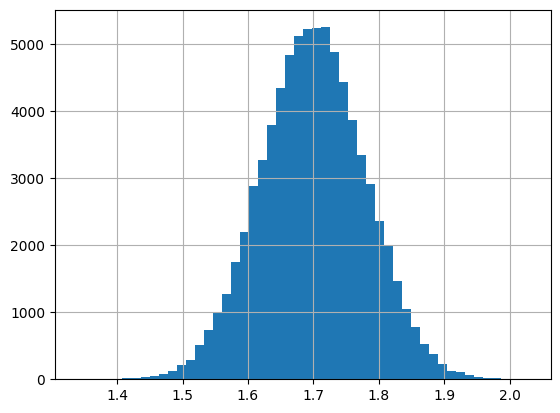

In [184]:
dados.altura.hist(bins=50)

### Critério do valor $p$

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [185]:
stat_test, p_valor = normaltest(dados.altura)
stat_test, p_valor

(0.19973093957002253, 0.9049591541967501)

In [186]:
p_valor <= significância

False

In [187]:
f'{"rejeitar H0" if p_valor <= significância else "não rejeitar H0"}'

'não rejeitar H0'

## 2.2 Etapas Básicas de um Teste

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$;

> ### Pontos importantes
> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


### **Passo 2** - escolha da distribuição amostral adequada;

> ### Pontos importantes
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### Pontos importantes
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png)
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### Pontos importantes
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### Pontos importantes
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira.
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

---

# 3 TESTES PARAMÉTRICOS

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

## 3.1 Teste Bicaudal

## Problema

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

### Dados do problema

In [188]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [189]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head(10)

,Amostra
0,509
1,505
2,495
3,510
4,496
5,509
6,497
7,502
8,503
9,505


In [190]:
média_amostra = amostra.mean()[0]
média_amostra

<ipython-input-190-281bf982cc51>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  média_amostra = amostra.mean()[0]


503.24

In [191]:
desvio_padrão_amostra = amostra.std()[0]
desvio_padrão_amostra

<ipython-input-191-2352ed542d53>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  desvio_padrão_amostra = amostra.std()[0]


4.48380305052735

In [192]:
média = 500
significância = 0.05
confiança = 1 - significância
n = 50

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### Lembre-se, a hipótese nula sempre contém a alegação de igualdade

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

### **Passo 3** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [193]:
from scipy.stats import norm

In [194]:
probabilidade = 0.5 + (confiança / 2)
probabilidade

0.975

### Obtendo $z_{\alpha/2}$

In [195]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

### $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [196]:
z = (média_amostra - média) / (desvio_padrão_amostra / np.sqrt(n))
z

5.109559775991873

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### Critério do valor crítico

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [197]:
z <= -z_alpha_2

False

In [198]:
z >= z_alpha_2

True

In [199]:
f'{"rejeitar h0" if z <= -z_alpha_2 or z >= z_alpha_2 else "não rejeitar h0"}'

'rejeitar h0'

### Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.

## Pesando embalagens

Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma distribuição normal e que o desvio padrão populacional é igual a 20 g. Considerando um nível de significância igual a 5%, responda as seguintes questões:

* Qual a hipótese nula a ser testada?
* Qual o valor da estatística de teste?
* Qual a conclusão do teste?

$H_0: \mu = 500$

$H_1: \mu \neq 500$

In [200]:
média_kjahakh = 500
média_amostra_kjahakh = 485
desvio_padrão_populacional_kjahakh = 20
significância_kjahakh = 0.05
confiança_kjahakh = 1 - significância_kjahakh
n_kjahakh = 30

média_kjahakh, média_amostra_kjahakh, desvio_padrão_populacional_kjahakh, significância_kjahakh, confiança_kjahakh, n_kjahakh

(500, 485, 20, 0.05, 0.95, 30)

In [201]:
probabilidade_kjahakh = 0.5 + (confiança_kjahakh / 2)
z_alpha_2_kjahakh = norm.ppf(probabilidade_kjahakh)
z_kjahakh = (média_amostra_kjahakh - média_kjahakh) / (desvio_padrão_populacional_kjahakh / np.sqrt(n_kjahakh))

probabilidade_kjahakh, z_alpha_2_kjahakh, z_kjahakh

(0.975, 1.959963984540054, -4.107919181288746)

In [202]:
z_kjahakh <= -z_alpha_2_kjahakh, z_kjahakh >= z_alpha_2_kjahakh, f'{"rejeitar h0" if z_kjahakh <= -z_alpha_2_kjahakh or z_kjahakh >= z_alpha_2_kjahakh else "não rejeitar h0"}'

(True, False, 'rejeitar h0')

### Critério do $p\text{-}valor$

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [203]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

3.2291031715203644e-07

In [204]:
p_valor = 2 * (norm.sf(z))
p_valor

3.229103172445771e-07

In [205]:
f'{"rejeitar h0" if p_valor <= significância else "não rejeitar h0"}'

'rejeitar h0'

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [206]:
from statsmodels.stats.weightstats import ztest

In [207]:
z, p_valor = ztest(x1=amostra, value=média)
z, p_valor

(array([5.10955978]), array([3.22910317e-07]))

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [208]:
from statsmodels.stats.weightstats import DescrStatsW

In [209]:
test = DescrStatsW(amostra)

In [210]:
z, p_valor = test.ztest_mean(value=média)
z, p_valor

(array([5.10955978]), array([3.22910317e-07]))

## Calculando o p-valor

Considere novamente os dados do exercício anterior.

Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g.

Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g.

Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g.

Com um nível de significância igual a 5%, teste a hipótese nula de que a média do processo é igual a 500 g e indique o p-valor do teste aplicado.

In [211]:
jadl_média = 500
jadl_média_amostra = 485
jadl_n = 30
jadl_desvio_padrão_populacional = 20
jadl_significância = 0.05
jadl_confiança = 1 - jadl_significância

jadl_média, jadl_média_amostra, jadl_n, jadl_desvio_padrão_populacional, jadl_significância, jadl_confiança

(500, 485, 30, 20, 0.05, 0.95)

In [212]:
z = (jadl_média_amostra - jadl_média) / (jadl_desvio_padrão_populacional / np.sqrt(jadl_n))
z

-4.107919181288746

In [213]:
2 * (1 - norm.cdf(abs(z))), 2 * norm.sf(abs(z))

(3.992397476904053e-05, 3.992397476901338e-05)

## 3.2 Teste Unicaudal

## Problema

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra.

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [214]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45]

In [215]:
amostra = pd.DataFrame(amostra, columns=['amostra'])
amostra.head(10)

,amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


In [216]:
média_amostra = amostra.mean()[0]
média_amostra

<ipython-input-216-281bf982cc51>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  média_amostra = amostra.mean()[0]


36.2504

In [217]:
desvio_padrão_amostra = amostra.std()[0]
desvio_padrão_amostra

<ipython-input-217-2352ed542d53>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  desvio_padrão_amostra = amostra.std()[0]


0.9667535018469455

In [218]:
média = 37
significância = 0.05
confiança = 1 - significância
n = 25
graus_de_liberdade = n -1

média, significância, confiança, n, graus_de_liberdade

(37, 0.05, 0.95, 25, 24)

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### Lembre-se, a hipótese nula sempre contém a alegação de igualdade

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Não

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

### **Passo 3** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [219]:
from scipy.stats import t as t_student

### Obtendo $t_{\alpha}$

In [220]:
t_alpha = t_student.ppf(confiança, graus_de_liberdade)
t_alpha

1.7108820799094275

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

### $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [221]:
t = (média_amostra - média) / (desvio_padrão_amostra / np.sqrt(n))
t

-3.876893119952081

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### Critério do valor crítico

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [222]:
f'{"rejeitar h0" if t >= t_alpha else "não rejeitar h0"}'

'não rejeitar h0'

### Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.

## Tratamento de esgoto

A empresa Limpa Esgoto garante ser capaz de realizar o tratamento de esgoto e obter, no máximo, 150 g de impurezas para cada mil litros de esgoto tratado. Vinte amostras de mil litros de esgoto apresentaram, em média, 230 g de impurezas e desvio padrão amostral igual a 90 g.

Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da empresa Limpa Esgoto? Assinale a alternativa que apresenta a estatística de teste e a decisão correta do teste.

In [223]:
limpa_média = 150
limpa_média_amostra = 230
limpa_desvio_padrão_amostra = 90
limpa_significância = 0.05
limpa_confiança = 1 - limpa_significância
limpa_n = 20
limpa_graus_de_liberdade = limpa_n - 1

limpa_média, limpa_média_amostra, limpa_desvio_padrão_amostra, limpa_significância, limpa_confiança, limpa_n, limpa_graus_de_liberdade

(150, 230, 90, 0.05, 0.95, 20, 19)

In [224]:
limpa_t_alpha = t_student.ppf(limpa_confiança, limpa_graus_de_liberdade)
limpa_t_alpha

1.729132811521367

In [225]:
limpa_t = (limpa_média_amostra - limpa_média) / (limpa_desvio_padrão_amostra / np.sqrt(limpa_n))
limpa_t

3.9752319599996264

In [226]:
f'{"rejeitar h0" if limpa_t >= limpa_t_alpha else "não rejeitar h0"}'

'rejeitar h0'

### Critério do valor $p$

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [227]:
t

-3.876893119952081

In [228]:
graus_de_liberdade

24

In [229]:
p_valor = t_student.sf(t, df=graus_de_liberdade)
p_valor

0.9996406170303819

In [230]:
f'{"rejeitar h0" if p_valor <= significância else "não rejeitar h0"}'

'não rejeitar h0'

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [231]:
from statsmodels.stats.weightstats import DescrStatsW

In [232]:
test = DescrStatsW(amostra)

In [233]:
t, p_valor, graus_de_liberdade = test.ttest_mean(value=média, alternative='larger')
t, p_valor, graus_de_liberdade

(array([-3.87689312]), array([0.99964062]), 24.0)

In [234]:
f'{"rejeitar h0" if p_valor <= significância else "não rejeitar h0"}'

'não rejeitar h0'

## Falta queijo na pizza?

A pizzaria Muito Queijo alega que a quantidade de queijo em suas pizzas tamanho família é de, no mínimo, 350 g. Uma amostra de 35 pizzas tamanho família revelou uma média de 330 g de queijo por pizza. O desvio padrão amostral foi de 80 g.

Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da alegação da pizzaria? Assinale a alternativa que apresenta a estatística de teste e a decisão correta do teste.

In [235]:
queijo_média = 350
queijo_média_amostra = 330
queijo_desvio_padrão_amostra = 80
queijo_n = 35
queijo_graus_de_liberdade = queijo_n - 1
queijo_significância = 0.05
queijo_confiança = 1 - queijo_significância

queijo_média, queijo_média_amostra, queijo_desvio_padrão_amostra, queijo_n, queijo_graus_de_liberdade, queijo_significância, queijo_confiança

(350, 330, 80, 35, 34, 0.05, 0.95)

In [236]:
queijo_t_alpha = t_student.ppf(queijo_confiança, queijo_graus_de_liberdade)
queijo_t_alpha

1.6909242551868549

In [237]:
queijo_t = (queijo_média_amostra - queijo_média) / (queijo_desvio_padrão_amostra / np.sqrt(queijo_n))
queijo_t

-1.479019945774904

In [238]:
f'{"rejeitar h0" if queijo_t <= -queijo_t_alpha else "não rejeitar h0"}'

'não rejeitar h0'

## 3.4 Testes para Duas Amostras

## Problema

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [239]:
homens = dados[dados.sexo == 0].sample(n=500, random_state=101).renda

In [240]:
mulheres = dados[dados.sexo == 1].sample(n=500, random_state=101).renda

### Dados do problema

In [241]:
média_amostra_h = homens.mean()
desvio_padrão_amostra_h = homens.std()

média_amostra_h, desvio_padrão_amostra_h

(2142.608, 2548.0508024998717)

In [242]:
média_amostra_m = mulheres.mean()
desvio_padrão_amostra_m = mulheres.std()

média_amostra_m, desvio_padrão_amostra_m

(1357.528, 1569.901190748458)

In [243]:
significância = 0.01
confiança = 1 - significância
n_h = n_m = 500
d_0 = 0

significância, confiança, n_h, n_m, d_0

(0.01, 0.99, 500, 500, 0)

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### Lembre-se, a hipótese nula sempre contém a alegação de igualdade

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### Observação importante
> Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [244]:
probabilidade = confiança
probabilidade

0.99

In [245]:
z_alpha = norm.ppf(probabilidade)
z_alpha

2.3263478740408408

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

### $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [246]:
numerador = (média_amostra_h - média_amostra_m) - d_0
denominador = np.sqrt((desvio_padrão_amostra_h ** 2 / n_h) + (desvio_padrão_amostra_m ** 2 / n_m))

z = numerador / denominador
z

5.8656200577647555

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### Critério do valor crítico

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [247]:
f'{"rejeitar h0" if z >= z_alpha else "não rejeitar h0"}'

'rejeitar h0'

### Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.

## Testando uma nova linha de shampoos

Um fabricante de cosméticos afirma que a adição de um novo composto químico em sua linha de shampoos consegue promover em mais de 2 centímetros o crescimento dos fios de cabelo em um período de 60 dias. Duas amostras de pessoas foram selecionadas e testadas, uma utilizando o shampoo novo (com o composto) e a outra com o shampoo antigo (sem o composto).

In [248]:
shampoo_novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

In [249]:
len(shampoo_novo), len(shampoo_antigo)

(10, 10)

Assumindo um nível de confiança de 95% e considerando que as populações se distribuem como uma normal, podemos acreditar na afirmação do fabricante do shampoo? Assinale a alternativa que apresenta a estatística de teste e a decisão correta do teste.

Um pouco mais de teoria: como se trata de um problema um pouco diferente do apresentado em nossa aula, vamos esclarecer alguns pontos para ajudar na solução:

1. Em testes entre duas amostras, quando realizamos a escolha da distribuição amostral adequada (passo 2) e perguntamos se `n ≥ 30`, temos que considerar que `n = n1 + n2`, onde `n1` é o tamanho da primeira amostra e `n2` o tamanho da segunda;

2. Quando `n1 + n2 ≥ 30`, utilizamos `z` (normal), e quando `n1 + n2 < 30`, `σ` não for conhecido e as populações forem normalmente distribuídas, utilizamos `t` (t-Student);

3. Quando utilizamos a tabela t de Student, em teste de duas amostras, os graus de liberdade são obtidos da seguinte forma: `n1 + n2 - 2`;

4. Quando o problema nos pergunta se podemos acreditar na afirmação do fabricante, está nos indicando o que devemos testar, ou seja, a nossa hipótese alternativa (`H1`), que no caso é: $H_1: \mu_1 - \mu_2 > 2$

Onde:

* $\mu_1$ = Crescimento médio dos cabelos com o uso do novo shampoo

* $\mu_2$ = Crescimento médio dos cabelos com o uso do shampoo antigo.

In [250]:
shampoo_novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

s_média_a = shampoo_novo.mean()
s_desvio_padrão_a = shampoo_novo.std()

s_média_b = shampoo_antigo.mean()
s_desvio_padrão_b = shampoo_antigo.std()

s_significância = 0.05
s_confiança = 1 - s_significância
s_n_a = len(shampoo_novo)
s_n_b = len(shampoo_antigo)
s_d_0 = 2

s_graus_de_liberdade = s_n_a + s_n_b - 2

In [251]:
s_t_alpha = t_student.ppf(s_confiança, s_graus_de_liberdade)
s_t_alpha

1.7340636066175354

In [252]:
numerador = (s_média_a - s_média_b) - d_0
denominador = np.sqrt((s_desvio_padrão_a ** 2 / s_n_a) + (s_desvio_padrão_b ** 2 / s_n_b))

s_t = numerador / denominador
s_t

8.72060202941868

In [253]:
f'{"rejeitar h0" if s_t >= s_t_alpha else "não rejeitar h0"}'

'rejeitar h0'

### Critério do valor $p$

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.ttest_ind.html

In [254]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [255]:
test_h = DescrStatsW(homens)
test_m = DescrStatsW(mulheres)

In [256]:
test_a = test_h.get_compare(test_m)

In [257]:
z, p_valor = test_a.ztest_ind(value=0, alternative='larger')
z, p_valor

(5.865620057764754, 2.2372867859458255e-09)

In [258]:
f'{"rejeitar h0" if p_valor <= significância else "não rejeitar h0"}'

'rejeitar h0'

In [259]:
test_b = CompareMeans(test_h, test_m)

In [260]:
z, p_valor = test_b.ztest_ind(value=0, alternative='larger')
z, p_valor

(5.865620057764754, 2.2372867859458255e-09)

In [261]:
f'{"rejeitar h0" if p_valor <= significância else "não rejeitar h0"}'

'rejeitar h0'

# 4 TESTES NÃO PARAMÉTRICOS

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

## Problema

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

## 4.1 Teste do Qui-Quadrado ( $\chi^2$)

Também conhecido como teste de adequação ao ajustamento, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra grega qui ( $\chi$) elevada ao quadrado. A tabela com os valores padronizados e como obtê-la podem ser vistos logo abaixo.

O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img016.png' width='250px'>

Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

## Problema

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

### Dados do problema

In [262]:
f_observada = [17, 33]
f_esperada = [25, 25]
significância = 0.05
confiança = 1 - significância
k = 2 # número de eventos possíveis
graus_de_liberdade = k - 1

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### Lembre-se, a hipótese nula sempre contém a alegação de igualdade

### $H_0: F_{CARA} = F_{COROA}$

### $H_1: F_{CARA} \neq F_{COROA}$

### **Passo 2** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [263]:
from scipy.stats import chi

### Obtendo $\chi_{\alpha}^2$

In [264]:
chi_2_alpha = chi.ppf(confiança, graus_de_liberdade) ** 2
chi_2_alpha

3.8414588206941245

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img018.png)

### **Passo 3** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

### $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [265]:
chi_2 = ((f_observada[0] - f_esperada[0]) ** 2) / (f_esperada[0])
chi_2 += ((f_observada[1] - f_esperada[1]) ** 2) / (f_esperada[1])
chi_2

5.12

In [266]:
chi_2 = 0

for i in range(k):
  chi_2 += ((f_observada[i] - f_esperada[i]) ** 2) / (f_esperada[i])

chi_2

5.12

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img019.png)

### **Passo 4** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img020.png' width=80%>

### Critério do valor crítico

> ### Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

In [267]:
f'{"rejeitar h0" if chi_2 > chi_2_alpha else "não rejeitar h0"}'

'rejeitar h0'

### Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.

### Critério do valor $p$

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [268]:
chi_2

5.12

In [269]:
raíz_chi_2 = np.sqrt(chi_2)
raíz_chi_2

2.262741699796952

In [270]:
p_valor = chi.sf(raíz_chi_2, df=graus_de_liberdade)
p_valor

0.023651616655356

In [271]:
significância

0.05

In [272]:
f'{"rejeitar h0" if p_valor <= significância else "não rejeitar h0"}'

'rejeitar h0'

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [273]:
from scipy.stats import chisquare

In [274]:
chi_2, p_valor = chisquare(f_obs=f_observada, f_exp=f_esperada)
chi_2, p_valor

(5.12, 0.023651616655356)

In [275]:
f'{"rejeitar h0" if p_valor <= significância else "não rejeitar h0"}'

'rejeitar h0'

## Obtendo o p-valor para um teste de Qui-quadrado

Na realização de um teste não paramétrico Qui-quadrado, com apenas 5 graus de liberdade, obteve-se a estatística de teste no valor de 7,45.

Qual seria o p-valor para este teste?

In [276]:
adkj_chi_2 = 7.45

chi.sf(np.sqrt(adkj_chi_2), df=5)

0.18926579121171602

## Problema

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

## 4.2 Teste Wilcoxon
### Comparação de duas populações - amostras dependentes

Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

### Dados do problema

In [277]:
fumo = {'antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
        'depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]}
significância = 0.05
confiança = 1 - significância
n = 35

In [278]:
fumo = pd.DataFrame(fumo)
fumo.head(10)

,antes,depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14
5,52,16
6,21,13
7,29,12
8,10,19
9,22,17


In [279]:
média_antes = fumo.antes.mean()
média_antes

31.857142857142858

In [280]:
média_depois = fumo.depois.mean()
média_depois

11.2

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### Lembre-se, a hipótese nula sempre contém a alegação de igualdade

### $H_0: \mu_{antes} = \mu_{depois}$

### $H_1: \mu_{antes} > \mu_{depois}$

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 20?
#### Resp.: Sim

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $z_{\alpha/2}$

In [281]:
probabilidade = (0.5 + (confiança / 2))
probabilidade

0.975

In [282]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

### $$Z = \frac{T - \mu_T}{\sigma_T}$$

Onde

## $T$ = menor das somas de postos de mesmo sinal

## $$\mu_T = \frac{n(n+1)}{4}$$
## $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

### Construindo a tabela com os postos

In [283]:
fumo.head(10)

,antes,depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14
5,52,16
6,21,13
7,29,12
8,10,19
9,22,17


In [284]:
fumo['diferença'] = fumo.depois - fumo.antes
fumo.head(10)

,antes,depois,diferença
0,39,16,-23
1,25,8,-17
2,24,12,-12
3,50,0,-50
4,13,14,1
5,52,16,-36
6,21,13,-8
7,29,12,-17
8,10,19,9
9,22,17,-5


In [285]:
fumo['diferença_absoluta'] = fumo.diferença.abs()
fumo.head(10)

,antes,depois,diferença,diferença_absoluta
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1
5,52,16,-36,36
6,21,13,-8,8
7,29,12,-17,17
8,10,19,9,9
9,22,17,-5,5


In [286]:
fumo = fumo.sort_values(by='diferença_absoluta')
fumo.head(10)

,antes,depois,diferença,diferença_absoluta
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


In [287]:
fumo['posto'] = range(1, len(fumo) + 1)
fumo.head(10)

,antes,depois,diferença,diferença_absoluta,posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5
9,22,17,-5,5,6
6,21,13,-8,8,7
29,23,14,-9,9,8
8,10,19,9,9,9
17,15,4,-11,11,10


In [288]:
colunas = ['diferença_absoluta', 'posto']

posto = fumo[colunas].groupby('diferença_absoluta').mean()
posto.head(10)

,posto
diferença_absoluta,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5
11,10.0
12,11.5
13,13.0


In [289]:
posto = posto.reset_index()
posto.head()

,diferença_absoluta,posto
0,1,1.5
1,2,3.0
2,4,4.5
3,5,6.0
4,8,7.0


In [290]:
fumo = fumo.drop('posto', axis='columns')
fumo.head(10)

,antes,depois,diferença,diferença_absoluta
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


In [291]:
fumo = fumo.merge(posto, left_on='diferença_absoluta', right_on='diferença_absoluta', how='left')
fumo.head(10)

,antes,depois,diferença,diferença_absoluta,posto
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5
5,22,17,-5,5,6.0
6,21,13,-8,8,7.0
7,23,14,-9,9,8.5
8,10,19,9,9,8.5
9,15,4,-11,11,10.0


In [292]:
fumo['posto_mais'] = fumo.apply(lambda x: x.posto if x.diferença > 0 else 0, axis='columns')

In [293]:
fumo['posto_menos'] = fumo.apply(lambda x: x.posto if x.diferença < 0 else 0, axis='columns')

In [294]:
fumo = fumo.drop('posto', axis='columns')
fumo.head(10)

,antes,depois,diferença,diferença_absoluta,posto_mais,posto_menos
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,12,16,4,4,4.5,0.0
4,14,18,4,4,4.5,0.0
5,22,17,-5,5,0.0,6.0
6,21,13,-8,8,0.0,7.0
7,23,14,-9,9,0.0,8.5
8,10,19,9,9,8.5,0.0
9,15,4,-11,11,0.0,10.0


### Obter $T$

## $T$ = menor das somas de postos de mesmo sinal

In [295]:
T = min(fumo.posto_mais.sum(), fumo.posto_menos.sum())
T

22.0

### Obter $\mu_T$

### $$\mu_T = \frac{n(n+1)}{4}$$


In [296]:
mu_T = (n * (n + 1)) / 4
mu_T

315.0

### Obter $\sigma_T$

### $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

In [297]:
sigma_T = np.sqrt((n * (n + 1) * ((2 * n) + 1)) / 24)
sigma_T

61.053255441458646

### Obter $Z_{teste}$

### $$Z = \frac{T - \mu_T}{\sigma_T}$$

In [298]:
Z = (T - mu_T) / sigma_T
Z

-4.799088891843698

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img021.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img022.png' width='80%'>

### Critério do valor crítico

> ### Rejeitar $H_0$ se $Z \leq -z_{\alpha / 2}$ ou se $Z \geq z_{\alpha / 2}$

In [299]:
f'{"rejeitar h0" if Z <= -z_alpha_2 or Z >= z_alpha_2 else "não rejeitar h0"}'

'rejeitar h0'

### Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.

### Critério do valor $p$

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [300]:
from scipy.stats import wilcoxon

In [301]:
t, p_valor = wilcoxon(fumo.antes, fumo.depois)
t, p_valor

(22.0, 3.119930624961853e-08)

In [302]:
f'{"rejeitar h0" if p_valor < significância else "não rejeitar h0"}'

'rejeitar h0'

## A importância dos cursos da Alura

Desconfiado da eficiência dos cursos e materiais de estudo online da Alura, um professor resolveu realizar um teste com um grupo de 14 alunos de sua classe. Para isto, ele submeteu estes alunos a duas etapas distintas e logo depois de cada etapa, aplicou uma avaliação. Na etapa inicial, foram oferecidas aulas normais, sem a utilização do material de apoio da Alura. Na segunda etapa, foram também oferecidas aulas normais, mas com a utilização do material de apoio da Alura. As notas obtidas pelos alunos estão na tabela abaixo:

In [303]:
alura = {'sem_alura': [7, 8, 6, 6, 10, 4, 2, 5, 9, 2, 4, 9, 1, 10],
         'com_alura': [10, 10, 9, 9, 9, 7, 5, 8, 10, 6, 3, 7, 4, 8]}

alura = pd.DataFrame(alura)
alura.head(10)

,sem_alura,com_alura
0,7,10
1,8,10
2,6,9
3,6,9
4,10,9
5,4,7
6,2,5
7,5,8
8,9,10
9,2,6


Apresente o resultado do teste, não paramétrico de Wilcoxon, aplicado pelo professor (estatística de teste T e decisão do teste). Considere um nível de significância de 10%.

In [304]:
alura_t, alura_p_valor = wilcoxon(alura.sem_alura, alura.com_alura)
alura_t, alura_p_valor

(14.0, 0.013427734375)

In [305]:
alura_significância = 0.1

In [306]:
f'{"rejeitar h0" if alura_p_valor < alura_significância else "não rejeitar h0"}'

'rejeitar h0'

## Problema

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **6 homens** e outra com **8 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade **teste a igualdade das médias** entra estas duas amostras com um nível de **significância de 5%**.

## 4.3 Teste de Mann-Whitney
### Comparação de duas populações - amostras independentes

Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média. Por ser um teste não paramétrico, Mann-Whitney torna-se uma alternativa ao teste paramétrico de comparação de médias.

### Seleção das amostras

In [307]:
homens = dados[(dados.sexo == 0) & (dados.renda > 0)].sample(n=6, random_state=101).renda
homens

,renda
67872,1200
30211,2000
64406,850
26519,800
61540,2000
17422,1200


In [308]:
mulheres = dados[(dados.sexo == 1) & (dados.renda > 0)].sample(n=8, random_state=101).renda
mulheres

,renda
6251,1100
34764,400
40596,788
11303,4300
22733,250
24707,400
60340,700
17035,788


### Dados do problema

In [309]:
média_amostra_homens = homens.mean()
média_amostra_homens

1341.6666666666667

In [310]:
média_amostra_mulheres = mulheres.mean()
média_amostra_mulheres

1090.75

In [311]:
significância = 0.05
confiança = 1 - significância
n1 = len(homens) #n1 (amostra de tamanho menor, padrão do teste)
n2 = len(mulheres) #n2

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### Lembre-se, a hipótese nula sempre contém a alegação de igualdade

### $\mu_m \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino
### $\mu_h \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino

### $
\begin{cases}
H_0: \mu_m = \mu_h\\
H_1: \mu_m < \mu_h
\end{cases}
$

### **Passo 2** - escolha da distribuição amostral adequada

Deve-se optar pela distribuição **$t$ de Student**, já que nada é mencionado sobre a distribuição da população, o desvio padrão populacional é desconhecido e o número de elementos investigados é menor que 30.

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $t_{\alpha}$

In [312]:
graus_de_liberdade = n1 + n2 - 2
graus_de_liberdade

12

In [313]:
t_alpha = t_student.ppf(significância, graus_de_liberdade)
t_alpha

-1.7822875556491593

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img023.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
## 1. Definir os n's:
### $n_1$ = nº de elementos do menor grupo
### $n_2$ = nº de elementos do maior grupo
---
## 2. Obter a soma dos postos
### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$
---
## 3. Obter as estatísticas
### $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
### $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$
---
## 4. Selecionar o menor U
### $$u = min(u_1, u_2)$$
---
## 5. Obter a estatística de teste
### $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

Onde

## $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$
## $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

### Obtendo os postos

In [314]:
h = pd.DataFrame(homens)
h['sexo'] = 'homens'
h

,renda,sexo
67872,1200,homens
30211,2000,homens
64406,850,homens
26519,800,homens
61540,2000,homens
17422,1200,homens


In [315]:
m = pd.DataFrame(mulheres)
m['sexo'] = 'mulheres'
m

,renda,sexo
6251,1100,mulheres
34764,400,mulheres
40596,788,mulheres
11303,4300,mulheres
22733,250,mulheres
24707,400,mulheres
60340,700,mulheres
17035,788,mulheres


In [316]:
sexo = pd.concat([h, m])
sexo = sexo.reset_index(drop=True)
sexo

,renda,sexo
0,1200,homens
1,2000,homens
2,850,homens
3,800,homens
4,2000,homens
5,1200,homens
6,1100,mulheres
7,400,mulheres
8,788,mulheres
9,4300,mulheres


In [317]:
sexo = sexo.sort_values(by='renda')
sexo

,renda,sexo
10,250,mulheres
7,400,mulheres
11,400,mulheres
12,700,mulheres
8,788,mulheres
13,788,mulheres
3,800,homens
2,850,homens
6,1100,mulheres
0,1200,homens


In [318]:
sexo['posto'] = range(1, len(sexo) + 1)
sexo

,renda,sexo,posto
10,250,mulheres,1
7,400,mulheres,2
11,400,mulheres,3
12,700,mulheres,4
8,788,mulheres,5
13,788,mulheres,6
3,800,homens,7
2,850,homens,8
6,1100,mulheres,9
0,1200,homens,10


In [319]:
colunas = ['renda', 'posto']

posto = sexo[colunas].groupby('renda').mean()
posto

,posto
renda,
250,1.0
400,2.5
700,4.0
788,5.5
800,7.0
850,8.0
1100,9.0
1200,10.5
2000,12.5


In [320]:
posto = posto.reset_index()
posto

,renda,posto
0,250,1.0
1,400,2.5
2,700,4.0
3,788,5.5
4,800,7.0
5,850,8.0
6,1100,9.0
7,1200,10.5
8,2000,12.5
9,4300,14.0


In [321]:
sexo = sexo.drop('posto', axis='columns')
sexo

,renda,sexo
10,250,mulheres
7,400,mulheres
11,400,mulheres
12,700,mulheres
8,788,mulheres
13,788,mulheres
3,800,homens
2,850,homens
6,1100,mulheres
0,1200,homens


In [322]:
sexo = sexo.merge(posto, left_on='renda', right_on='renda', how='left')
sexo

,renda,sexo,posto
0,250,mulheres,1.0
1,400,mulheres,2.5
2,400,mulheres,2.5
3,700,mulheres,4.0
4,788,mulheres,5.5
5,788,mulheres,5.5
6,800,homens,7.0
7,850,homens,8.0
8,1100,mulheres,9.0
9,1200,homens,10.5


### Obtendo $R$

### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$

In [323]:
colunas = ['sexo', 'posto']

temp = sexo[colunas].groupby('sexo').sum()
temp

,posto
sexo,
homens,61.0
mulheres,44.0


In [324]:
R_1 = temp.loc['homens'][0]
R_1

<ipython-input-324-caff3322040d>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  R_1 = temp.loc['homens'][0]


61.0

In [325]:
temp.iloc[0, 0]

61.0

In [326]:
temp.at['homens', 'posto']

61.0

In [327]:
R_2 = temp.loc['mulheres'][0]
R_2

<ipython-input-327-e8e865009b6a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  R_2 = temp.loc['mulheres'][0]


44.0

In [328]:
temp.iloc[1, 0]

44.0

In [329]:
temp.at['mulheres', 'posto']

44.0

### Obter $u$

### $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
### $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$

### $$u = min(u_1, u_2)$$


In [330]:
u1 = n1 * n2 + ((n1 * (n1 + 1)) / (2)) - R_1
u1

8.0

In [331]:
u2 = n1 * n2 + ((n2 * (n2 + 1)) / (2)) - R_2
u2

40.0

In [332]:
u = min(u1, u2)
u

8.0

### Obter $\mu{(u)}$

### $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$

In [333]:
mu_u = (n1 * n2) / 2
mu_u

24.0

### Obter $\sigma{(u)}$

### $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

In [334]:
sigma_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
sigma_u

7.745966692414834

### Obter $Z$

### $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

In [335]:
Z = (u - mu_u) / sigma_u
Z

-2.065591117977289

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img024.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img025.png' width='80%'>

### Critério do valor crítico

> ### Rejeitar $H_0$ se $Z \leq -t_{\alpha}$

In [336]:
f'{"rejeitar h0" if Z <= t_alpha else "não rejeitar h0"}'

'rejeitar h0'

### Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo feminino é menor que a média das rendas dos chefes de domicílios do sexo masculino. Confirmando a alegação de desigualdade de renda entre os sexos.

### Critério do valor $p$

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [337]:
from scipy.stats import mannwhitneyu

In [338]:
u, p_valor = mannwhitneyu(mulheres, homens, alternative='less')
u, p_valor

(8.0, 0.022221119551528605)

In [339]:
f'{"rejeitar h0" if p_valor < significância else "não rejeitar h0"}'

'rejeitar h0'

## Testando teorias

Um professor acredita que alunos que praticam exercícios físicos têm uma performance média escolar superior àquela obtida por alunos que não praticam. Para provar sua teoria, selecionou duas amostras aleatórias, uma com 9 alunos que não praticam exercícios físicos e outra com 10 alunos que cultivam o hábito de se exercitar.

In [340]:
sem_exercícios = pd.Series([7, 6, 7, 8, 6, 8, 6, 9, 5])
com_exercícios = pd.Series([8, 7, 6, 6, 8, 6, 10, 6, 7, 8])

Teste a hipótese da média das notas dos alunos que praticam exercícios ser maior que a média das notas dos alunos que não praticam. Apresente o resultado do teste (estatística de teste u e decisão do teste). Considere um nível de significância de 10%.

In [341]:
significância = 0.1

In [342]:
u, p_valor = mannwhitneyu(com_exercícios, sem_exercícios, alternative='greater')
u, p_valor

(50.0, 0.35118642828565927)

In [343]:
f'{"rejeitar h0" if p_valor < significância else "não rejeitar h0"}'

'não rejeitar h0'

In [344]:
# então rejeitamos h1 que é média com exercício > média sem exercício